# Линейная регрессия


## Оценка результатов

Чтобы оценить качество работы алгоритма нам необходимо применяют разные метрики. Наиболее частые метрики средневадратичная и средняя абсолютная ошибки. Вычислим эти метрики на обучающей и на тестовой выборках. 

 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

Загрузим необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

Пример 1. Сгенерируем искусственные данные. Сначала поработаем с простейшим одномерным случаем, когда у нас значение $y$ будет зависеть только от одного значения $x$.




In [ ]:
def generate_data(n_points=20):
  """
    Принимает на вход n_points точек 
    Возвращает данные для обучения и теста
  """
  X = np.linspace(-5, 5, n_points)
  y = 10 * X - 7

  X_train = X[0::2].reshape(-1, 1)
  y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1)
  y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, X_train, y_train, X_test, y_test

In [ ]:
X, X_train, y_train, X_test, y_test = generate_data(100)

Generated 50 train samples and 50 test samples


Визуализируем данные, используя библиотеку matplotlib. Мы сразу разделили наши данные на обучающую и тестовую выборки (точки обозначены разными цветами).

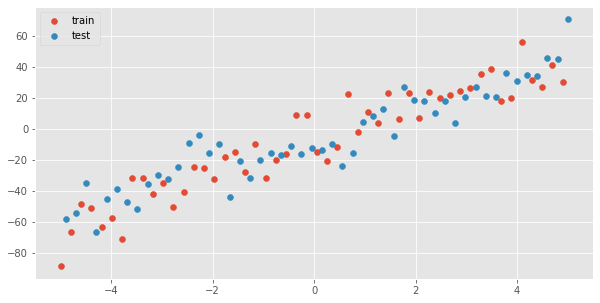

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.legend(loc='best')
plt.show()

## Задание 3.1

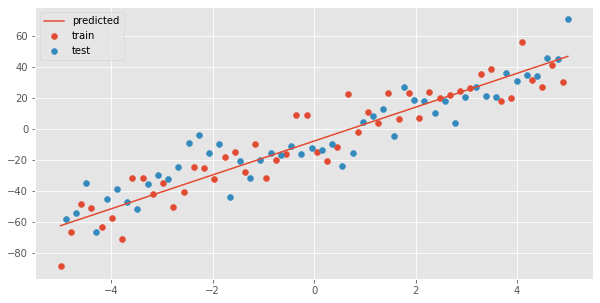

w_own = 10.914935846567827 
b_own = -8.001553549181029
w_sklearn = 10.914935846567825 
b_sklearn = -8.001553549181034

Train MSE:  127.30692045085944
Train MAE:  9.347406668648881
Test MSE:  132.70322426073193
Test MAE:  8.870997951481582

Train_sklearn MSE:  127.3069204508595
Train_sklearn MAE:  9.347406668648883
Test_sklearn MSE:  128.92157861100156
Test_sklearn MAE:  8.729136376707435


In [ ]:
### Реализуйте настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE. Сравните с результатами из sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

def LLS(train_X, train_y):
  x = np.insert(train_X, 0, 1, axis=1)
  params = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.transpose(), x)),x.transpose()), train_y)
  return params[1], params[0]
def mean_squared_error_manual(y, y_p):
  sum = 0
  for i in range(0,len(y)):
    sum += (y[i] - y_p[i])**2
  return sum/len(y)
  
def mean_absolute_error_manual(y, y_p):
  sum = 0
  for i in range(0,len(y)):
    sum += abs(y[i] - y_p[i])
  return sum/len(y)

model = LinearRegression()
model.fit(X_train, y_train) # обучение модели
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
w, b = model.coef_[0], model.intercept_
w1, b1 = LLS(X_train, y_train)
plt.plot(X, X.dot(w) + b, label='predicted')
plt.legend()
plt.show()

y_pred = w1 * X_train + b1
print("w_own =",w1, "\nb_own =", b1)
print("w_sklearn =",w, "\nb_sklearn =", b)

Train_MAE = mean_absolute_error_manual(y_train, y_pred)
Train_MSE = mean_squared_error_manual(y_train, y_pred)
Test_MAE = mean_absolute_error_manual(y_test, y_pred)
Test_MSE = mean_squared_error_manual(y_test, y_pred)
print("\nTrain MSE: ", Train_MSE[0])
print("Train MAE: ", Train_MAE[0])
print("Test MSE: ", Test_MSE[0])
print("Test MAE: ", Test_MAE[0])

y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)
print("\nTrain_sklearn MSE: ", mean_squared_error(y_train, y_train_predicted))
print("Train_sklearn MAE: ", mean_absolute_error(y_train, y_train_predicted))
print("Test_sklearn MSE: ", mean_squared_error(y_test, y_test_predicted))
print("Test_sklearn MAE: ", mean_absolute_error(y_test, y_test_predicted))

w и b, полученные в ходе настройки методом наименьших квадратов очень близки к sklearn. Найденные значения метрик MSE и MAE так же близки к sklearn

## Задание 3.2

Пример 2. Не всегда в задаче регрессии в качестве решения выступает прямая, как в предыдущем случае. Рассмотрим ещё один пример, в котором у объектов всё ещё один признак. Но теперь мы будм брать случайную точку на синусоиде и добавлять к ней шум — таким образом получим целевую переменную, признаком в этом случае будет координата $x$.

In [ ]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_wave_set(1000, 250)

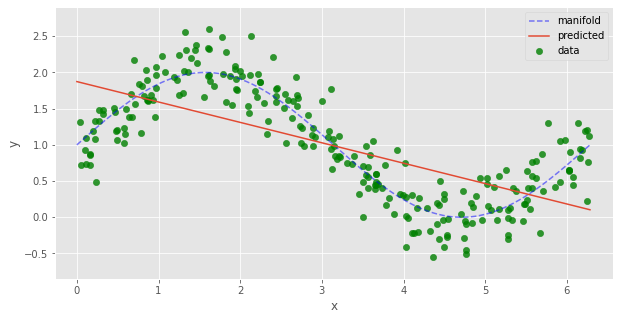

w = -0.281725342548744 b = 1.8737235786957316
Train MSE:  0.31031184268264966
Train MAE:  0.464090678833071
Test MSE:  0.1983801273250008
Test MAE:  0.395998191190856


In [ ]:
### попробуйте реализовать настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE
w2, b2  = LLS(data['x_train'].reshape(-1,1), data['y_train'])
plt.figure(figsize=(10, 5))
margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.plot(data['support'], data['support'].reshape(-1, 1).dot(w2) + b2, label='predicted')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print("w =", w2, "b =", b2)
y_pred_sin = w2 * data['x_train'].reshape(-1,1) + b2
print('Train MSE: ', mean_squared_error_manual(data['y_train'], y_pred_sin)[0])
print('Train MAE: ', mean_absolute_error_manual(data['y_train'], y_pred_sin)[0])
y_pred_sin = w2 * data['support'].reshape(-1,1) + b2
print("Test MSE: ", mean_squared_error_manual(data['values'], y_pred_sin)[0])
print("Test MAE: ", mean_absolute_error_manual(data['values'], y_pred_sin)[0])

## Задание 3.3

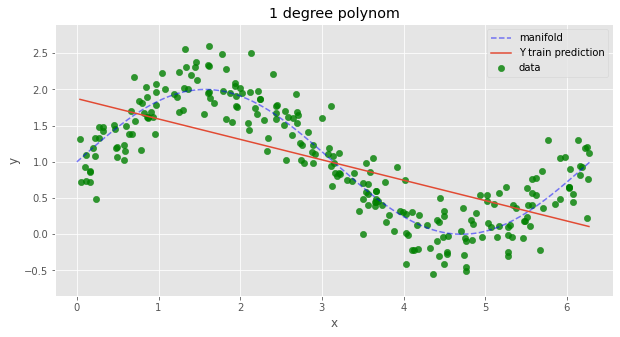

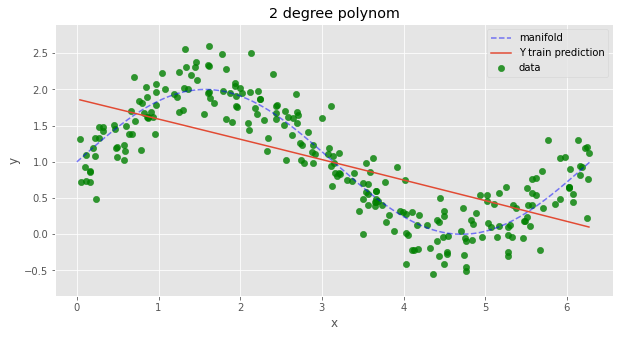

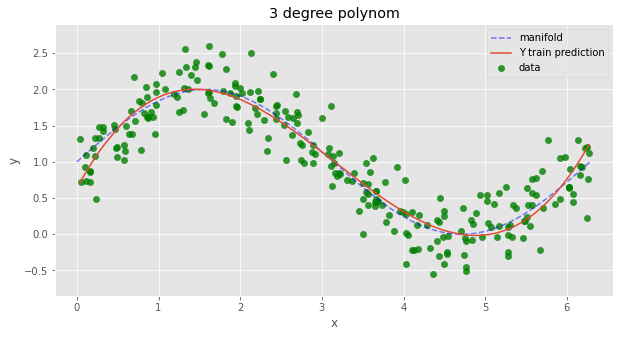

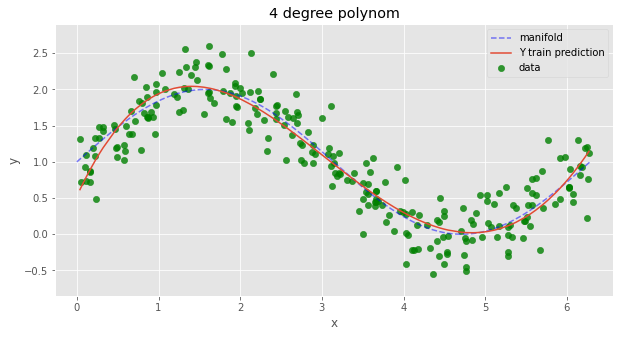

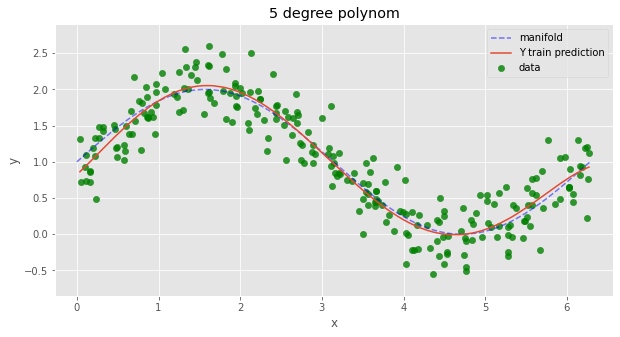

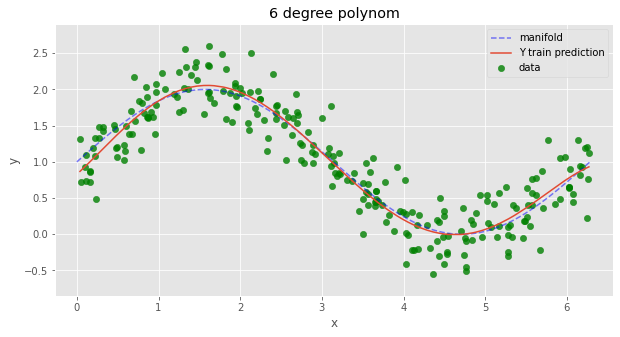

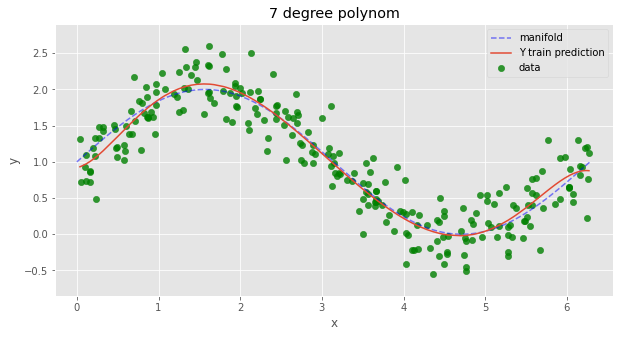

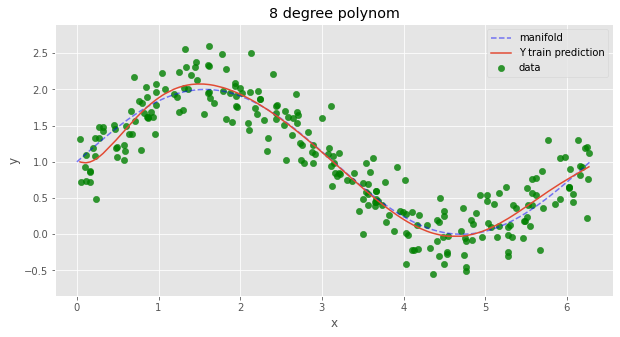

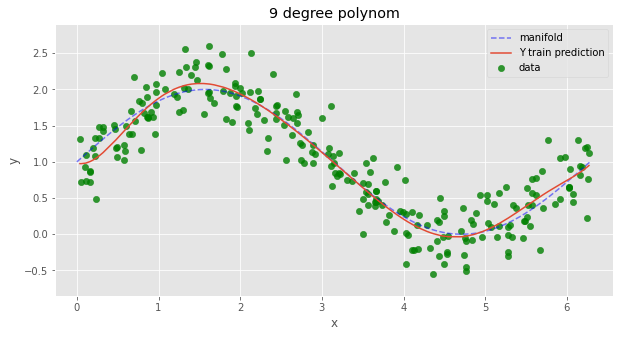

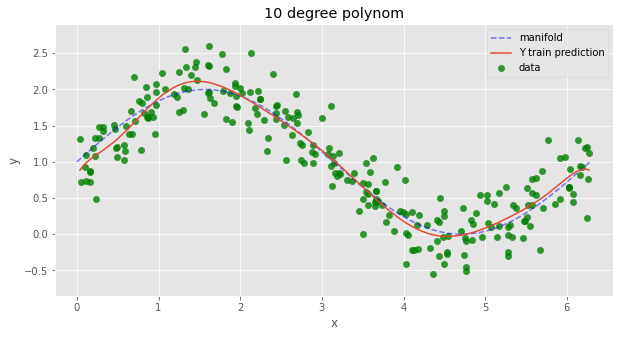

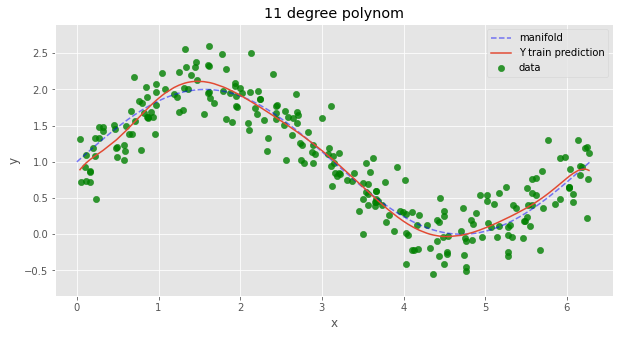

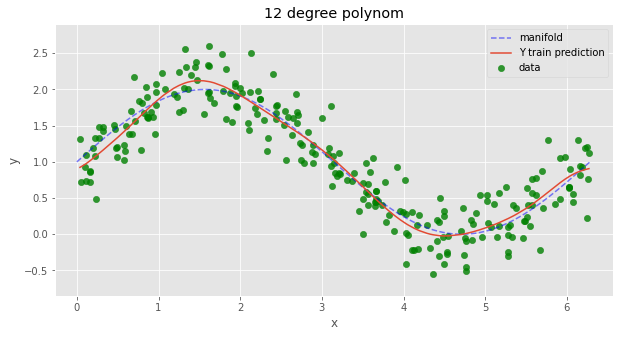

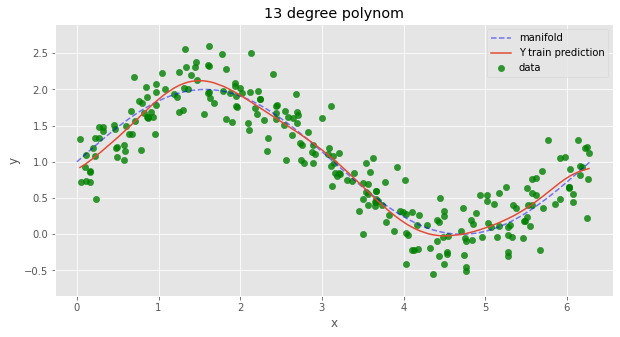

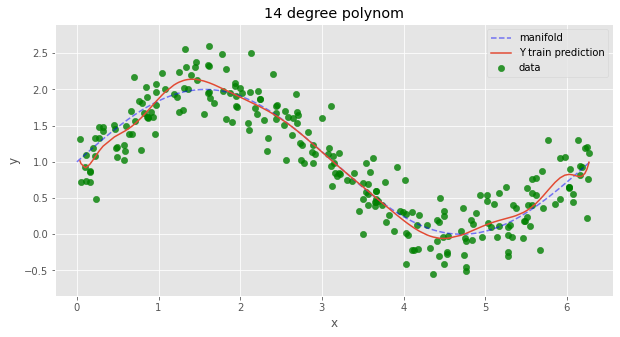

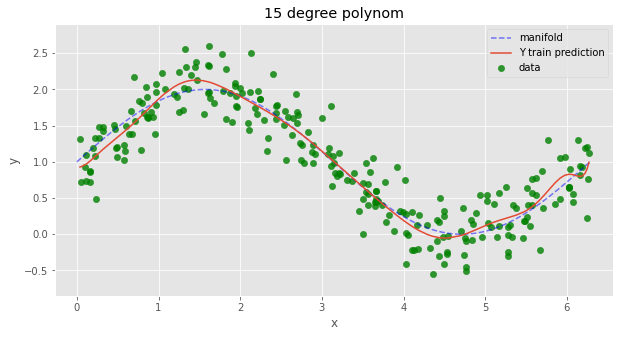

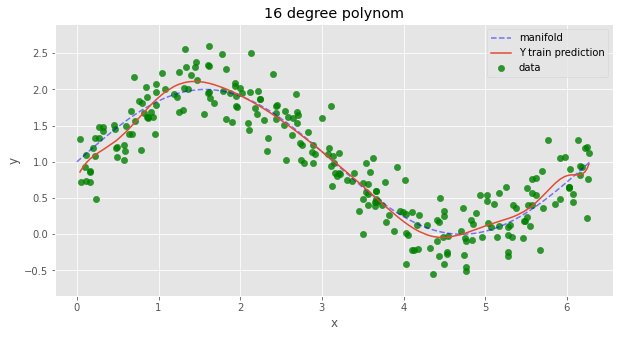

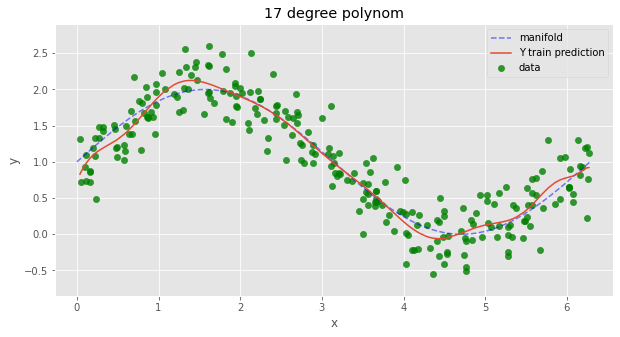

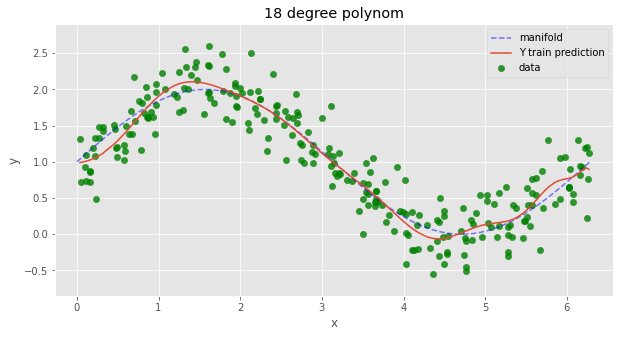

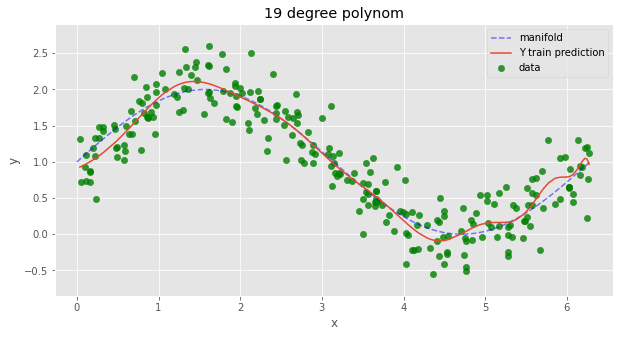

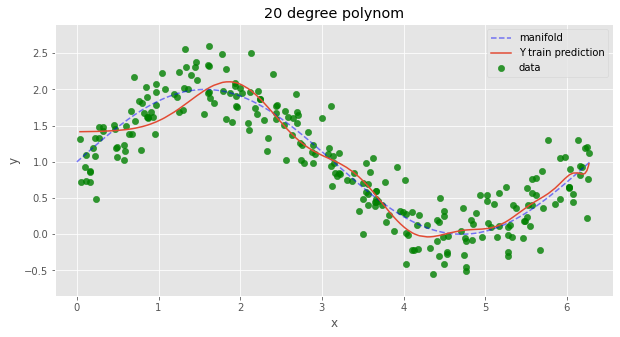

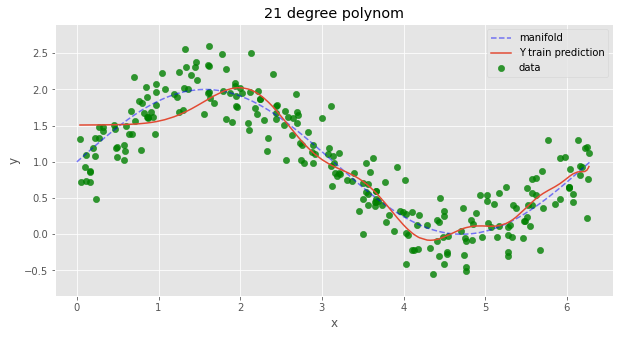

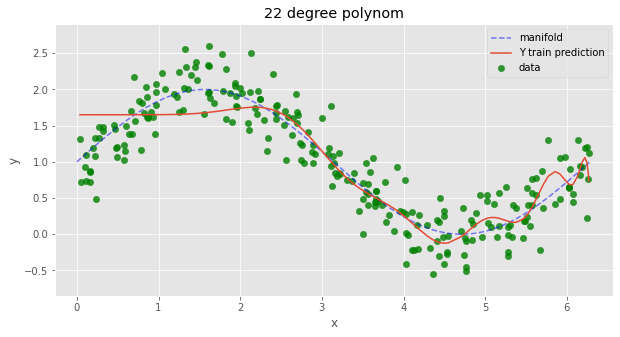

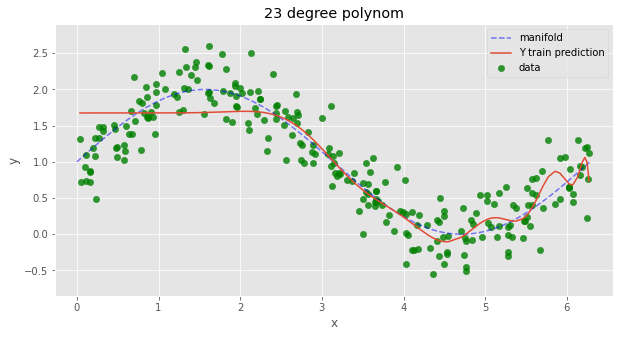

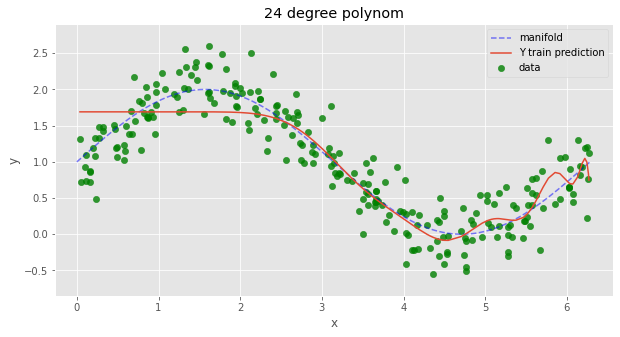

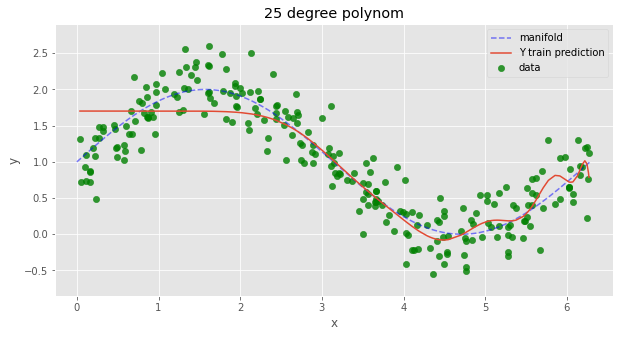

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
### Введите свой код.
### Реализуйте полиномиальную регрессию. Сделайте визуализацию для полиномов разных степеней. 
### Полином какой степени подходит больше других? Почему?
for i in range(1,26):
  plt.figure(figsize=(10, 5))
  margin = 0.3
  plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
  plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
  pol_reg = Pipeline([('Polynom', PolynomialFeatures(degree=i)),('Linear', LinearRegression())])
  pol_reg.fit(data['x_train'].reshape(-1, 1), data['y_train'])
  prediction = pol_reg.predict(data['x_train'].reshape(-1, 1))
  plt.plot(data['x_train'], prediction, label='Y train prediction')
  plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
  plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
  plt.legend(loc='upper right')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('%i degree polynom' %i)
  plt.show()

Лучше всего подходит полином 3 степени, так как используя полином высокой степени есть риск натолкнуться на overfitting (модель слишком сильно подстроится под тренировочные данные).

# Реальный датасет

Возьмём реальный набор данных Boston из sklearn.datasets. Этот датасет описывает средние цены на недвижимость в районах Бостона в тысячах долларов.

Примеры признаков объектов недвижимости: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

##Задание 3.4

In [ ]:
### оставьте в наборе данных только 7 наиболее значимых признаков
### настройте параметры линейной регрессии и сравните метрики качества (MSE и MAE) для полного датасета и усечённого
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
house_data = load_boston()
X = pd.DataFrame(house_data['data'], columns=house_data['feature_names'])
y = house_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LinearRegression()

model.fit(X_train, y_train)

y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)
dropped_X = pd.DataFrame({"values" : abs(model.coef_), "signs" : X.columns})
dropped_X = dropped_X.sort_values(by="values", ascending=False).head(7)
top_7 = X[dropped_X['signs']]
print("Топ 7 значимых признаков:",top_7.columns.values)

model = LinearRegression()
top_X_train, top_X_test, top_y_train, top_y_test = train_test_split(top_7, y, train_size=0.7)

model.fit(top_X_train, top_y_train)
top_train_pred = model.predict(top_X_train)
top_test_pred = model.predict(top_X_test)

print("\nTop 7:")
print("MSE train in top 7:", mean_squared_error(top_y_train, top_train_pred))
print("MSE test in top 7:", mean_squared_error(top_y_test, top_test_pred))
print("MAE train in top 7:", mean_absolute_error(top_y_train, top_train_pred))
print("MAE test in top 7:", mean_absolute_error(top_y_test, top_test_pred), "\n")
print("Full: ")
print("MSE train in initial:", mean_squared_error(y_train, y_train_prediction))
print("MSE test in initial:", mean_squared_error(y_test, y_test_prediction))
print("MAE train in initial:", mean_absolute_error(y_train, y_train_prediction))
print("MAE test in initial:", mean_absolute_error(y_test, y_test_prediction), "\n")
print('Сравнение:')
print('MSE train ', 'лучше в полном' if mean_squared_error(y_train, y_train_prediction) <  mean_squared_error(top_y_train, top_train_pred) else 'лучше в усеченном')
print('MSE test',  'лучше в полном' if mean_squared_error(y_test, y_test_prediction) < mean_squared_error(top_y_test, top_test_pred)   else 'лучше в усеченном')
print('MAE train ', 'лучше в полном' if mean_absolute_error(y_train, y_train_prediction) <  mean_squared_error(top_y_train, top_train_pred) else 'лучше в усеченном')
print('MAE test',  'лучше в полном' if mean_absolute_error(y_test, y_test_prediction) < mean_squared_error(top_y_test, top_test_pred)   else 'лучше в усеченном')


Топ 7 значимых признаков: ['LSTAT' 'DIS' 'RM' 'RAD' 'TAX' 'PTRATIO' 'NOX']

Top 7:
MSE train in top 7: 25.726055903745905
MSE test in top 7: 20.70384878243804
MAE train in top 7: 3.6605005614498345
MAE test in top 7: 3.2549672414099295 

Full: 
MSE train in initial: 21.17002782273495
MSE test in initial: 24.31605903146552
MAE train in initial: 3.1531572962910226
MAE test in initial: 3.4084230244494393 

Сравнение:
MSE train  лучше в полном
MSE test лучше в усеченном
MAE train  лучше в полном
MAE test лучше в полном
